In [19]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import warnings
warnings.filterwarnings('ignore')


## Load Dataset

In [20]:
X_train = np.loadtxt(r'E:\Cnn project\Image Classification CNN Keras Dataset-20241124T114956Z-001\Image Classification CNN Keras Dataset\input.csv', delimiter = ',')
Y_train = np.loadtxt(r'E:\Cnn project\Image Classification CNN Keras Dataset-20241124T114956Z-001\Image Classification CNN Keras Dataset\labels.csv', delimiter = ',')

X_test = np.loadtxt(r'E:\Cnn project\Image Classification CNN Keras Dataset-20241124T114956Z-001\Image Classification CNN Keras Dataset\input_test.csv', delimiter = ',')
Y_test = np.loadtxt(r'E:\Cnn project\Image Classification CNN Keras Dataset-20241124T114956Z-001\Image Classification CNN Keras Dataset\labels_test.csv', delimiter = ',')

### Printing the Shapes of the DataSet

In [21]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 30000)
Shape of Y_train:  (2000,)
Shape of X_test:  (400, 30000)
Shape of Y_test:  (400,)


### Reshaping of the Data in Appropriate Image Sizes

In [22]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)


In [23]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


### To train the model properly the values are rescaled

In [24]:
X_train = X_train/255 # for better training of our model we have converted it in range from 0 to 1 
X_test = X_test/255

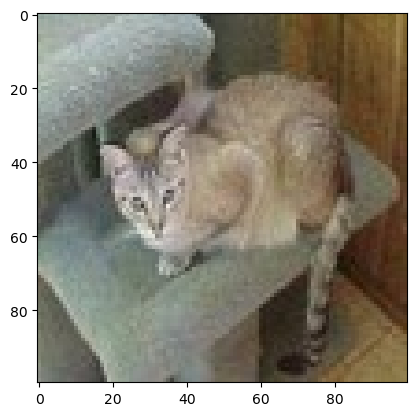

In [25]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model Building

In [26]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape= (100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(128,activation= 'relu'),
    Dense(1, activation= 'sigmoid')
])



In [ ]:
#Another Method of building the model
# model = Sequential()

# model.add(Conv2D(32, (3,3), activation='relu', input_shape= (100,100,3)))
# model.add(MaxPooling2D((2,2)))   
#    # Layers are added manually       
# model.add(Conv2D(32, (3,3), activation='relu'))
# model.add(MaxPooling2D((2,2)))
          
# model.add(Flatten())
# model.add(Dense(64,activation= 'relu'))
# model.add(Dense(1, activation= 'sigmoid'))

## Adding cost function and back propogation

In [27]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.fit(X_train, Y_train, epochs=7, batch_size=32)

Epoch 1/7
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 290ms/step - accuracy: 0.5322 - loss: 0.7454
Epoch 2/7
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 282ms/step - accuracy: 0.6290 - loss: 0.6608
Epoch 3/7
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 282ms/step - accuracy: 0.6897 - loss: 0.5851
Epoch 4/7
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 276ms/step - accuracy: 0.7472 - loss: 0.5010
Epoch 5/7
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 272ms/step - accuracy: 0.8046 - loss: 0.4089
Epoch 6/7
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 272ms/step - accuracy: 0.8686 - loss: 0.2854
Epoch 7/7
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 272ms/step - accuracy: 0.9340 - loss: 0.1719


## Model Evaluation on test Data set

In [29]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.5578 - loss: 1.1127


[0.9704388380050659, 0.6175000071525574]

# Making Prediction for the individual project

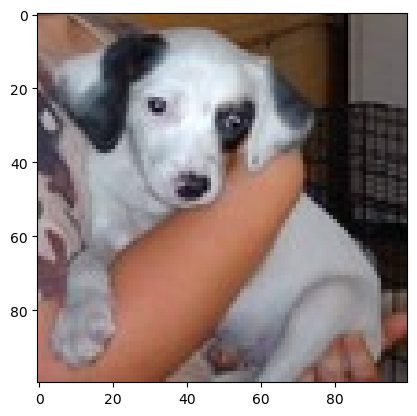

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.00165468]]


In [32]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()


y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
print(y_pred)
    

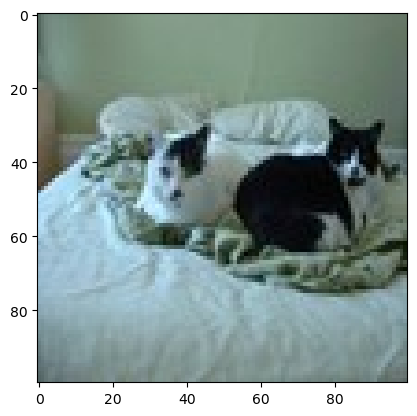

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Our model says it is a : cat


In [37]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5# As seen in above output probability of dog pic is showing the nearly Zero

if(y_pred ==0):
    pred='dog'
else:
    pred = 'cat'
    
print("Our model says it is a :", pred)